# DTS Demo Day Project - Fintench/Banking and Finance

**FIN 9 :**
- Ashari Retno Andrianti : 152236035100-240
- Diana Pratiwi : 152236035100-348


**Instruction:**

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') dilanggan oleh pelanggan. Folder data berisi dua kumpulan data:
- train.csv: 45.211 baris dan 18 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
- test.csv: 4521 baris dan 18 kolom dengan 10% contoh (4521), dipilih secara acak dari data train.csv

**Objective:**

Untuk memprediksi pelanggan bank yang cenderung akan menerima penawaran deposito.

## INSTALL PACKAGES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
pd.set_option('display.max_columns',None)

## INPUT DATA

In [ ]:
# Upload dataset
from google.colab import files
upload = files.upload()

Saving finance_test.csv to finance_test.csv
Saving finance_train.csv to finance_train.csv


In [ ]:
# Read dataset
train = pd.read_csv('finance_train.csv',sep=';')
test = pd.read_csv('finance_test.csv', sep=';')

In [ ]:
# Data train
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Data test
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Ukuran data
print("Ukuran Data Training :", train.shape)
print("Ukuran Data Tresting :", test.shape)

Ukuran Data Training : (45211, 17)
Ukuran Data Tresting : (4521, 17)


## EXPLORE DATASET

**Deskripsi Data :**
1. Numerical Data
- age: umur
- balance : saldo tabungan
- day: tanggal dihubungi (1, 2, 3, ..., 31)
- duration : durasi penawaran melalui telepon berlangsung
- campaign : berapa kali dihubungi selama campaign berlangsung
- pdays: berapa hari berlalu setelah terakhir kali pelanggan dihubungi untuk ditawari deposito
- previous: berapa kali dihubungi sebelum campaign dilaksanakan


2. Categorical Data
- job: jenis pekerjaan (blue-collar, management, technician, admin, services, retired, self-employed, entrepreneur, unemployed, housemaid, student,   unknown)
- marital: status pernikahan (married, single, divorced)
- education: pendidikan (secondary, tertiary, primary, unknown)
- default: punya kredit? (no, yes)
- housing: punya kredit rumah? (no, yes)
- loan: punya pinjaman? (no, yes)
- contact: sarana komunikasi (cellular, unknown, telephone)
- month: bulan dihubungi (jan, feb, ... dec)
- poutcome: hasil dari campaign sebelumnya (unknown, failure, other, success)
- y: respon pelanggan terhadap penawaran produk deposito (no, yes)

**Check Missing Values :** Data clean, tidak ada missing values dari dataset

In [ ]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Check Data Types :** tipe data sudah sesuai, perubahan tipe data untuk kebutuhan analisis akan dilakukan pada tahapan data prepocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Explore Variables**

In [ ]:
columns = train.columns.values
print(columns)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [ ]:
# Overview Data
for col in columns:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")    
    print(train[col].value_counts(), "\n")

age 
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

balance 
--------------------
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584   

In [ ]:
# Statistics Summary
print(train[columns].describe(include='all', percentiles=[]))

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12       

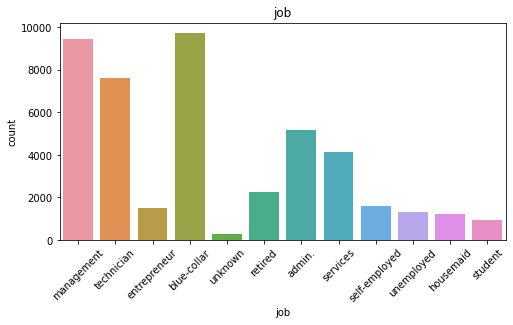

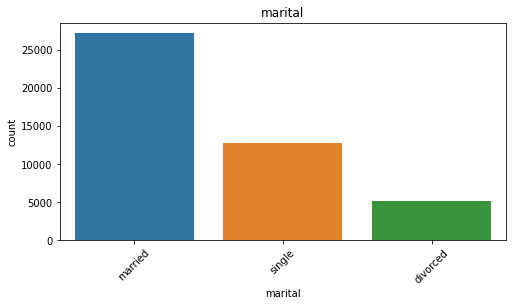

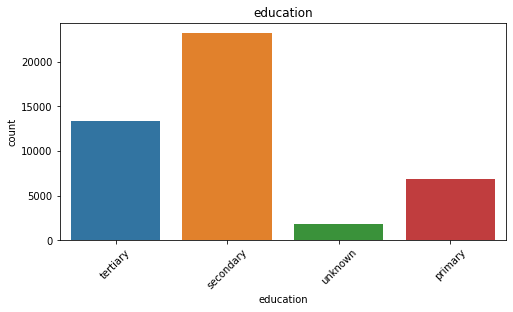

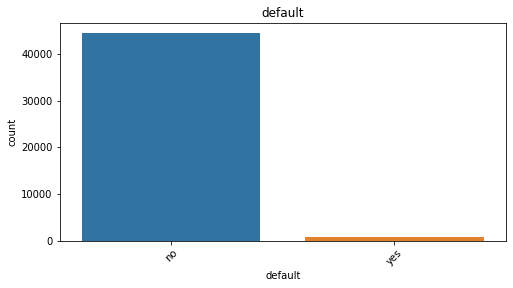

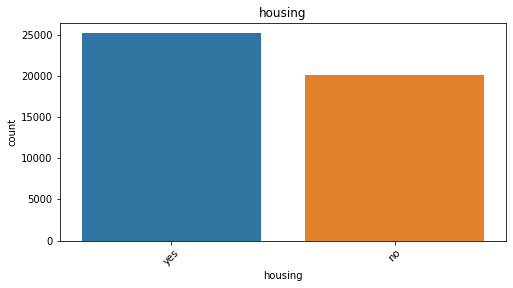

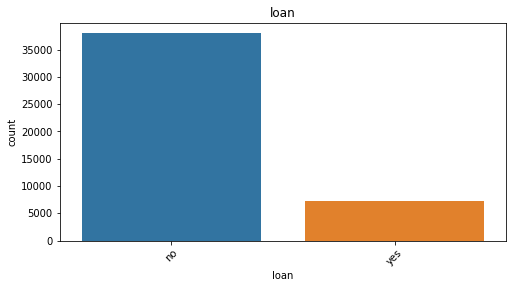

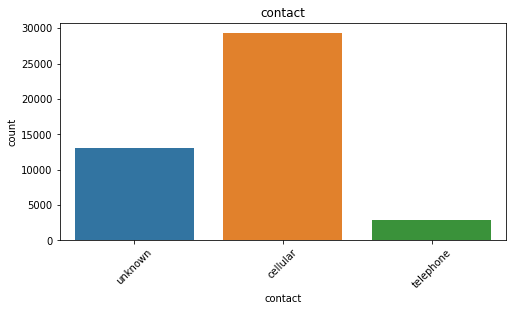

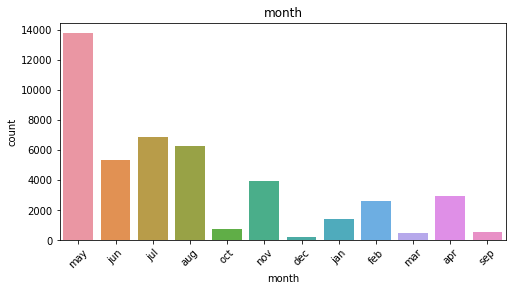

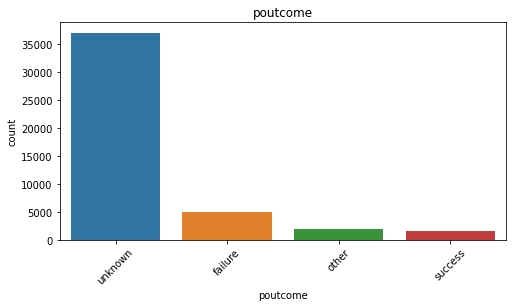

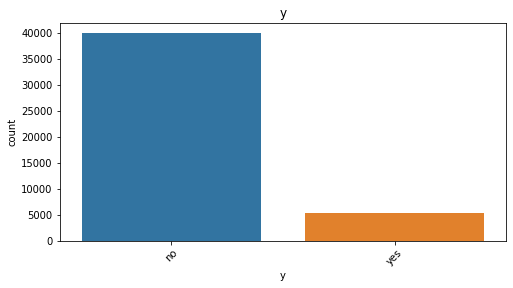

In [ ]:
# Visualisasi Grafik untuk Data Category
categorical = train.select_dtypes(include=['object']).columns.values

for col in categorical:
    plt.figure(figsize=(8,4))    
    #sns.barplot(x=train[col].value_counts().values, y=train[col].value_counts().index, data=train)
    sns.countplot(x=train[col], data=train)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing 1

Pembentukan variabel baru jika diperlukan dan feature selection

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


**Change Data Category --> Numeric**

In [ ]:
# Var default
def num_default(df):
  if (df['default'] == 'yes'):
    return 1
  elif (df['default'] == 'no'):
    return 0
  else:
    return 999

In [ ]:
train['default_new'] = train.apply(num_default, axis=1)
test['default_new'] = test.apply(num_default, axis=1)

In [ ]:
# Before changing (train)
train.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
# After changing (train)
train.default_new.value_counts()

0    44396
1      815
Name: default_new, dtype: int64

In [ ]:
# Before changing (test)
test.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [ ]:
# Afer changing (test)
test.default_new.value_counts()

0    4445
1      76
Name: default_new, dtype: int64

In [ ]:
# Var housing
def num_housing(df):
  if (df['housing'] == 'yes'):
    return 1
  elif (df['housing'] == 'no'):
    return 0
  else:
    return 999

In [ ]:
train['housing_new'] = train.apply(num_housing, axis=1)
test['housing_new'] = test.apply(num_housing, axis=1)

In [ ]:
# Before changing (train)
train.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
# After changing (train)
train.housing_new.value_counts()

1    25130
0    20081
Name: housing_new, dtype: int64

In [ ]:
# Before changing (test)
test.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [ ]:
# After changing (test)
test.housing_new.value_counts()

1    2559
0    1962
Name: housing_new, dtype: int64

In [ ]:
# Var loan
def num_loan(df):
  if (df['loan'] == 'yes'):
    return 1
  elif (df['loan'] == 'no'):
    return 0
  else:
    return 999

In [ ]:
train['loan_new'] = train.apply(num_loan, axis=1)
test['loan_new'] = test.apply(num_loan, axis=1)

In [ ]:
# Before changing (train)
train.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
# After changing (train)
train.loan_new.value_counts()

0    37967
1     7244
Name: loan_new, dtype: int64

In [ ]:
# Before changing (test)
test.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [ ]:
# After changing (test)
test.loan_new.value_counts()

0    3830
1     691
Name: loan_new, dtype: int64

In [ ]:
# Labels (Y)
def num_labels(df):
  if (df['y'] == 'yes'):
    return 1
  elif (df['y'] == 'no'):
    return 0
  else:
    return 999

In [ ]:
train['labels'] = train.apply(num_labels, axis=1)
test['labels'] = test.apply(num_labels, axis=1)

In [ ]:
# Before changing (train)
train.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# After changing (train)
train.labels.value_counts()

0    39922
1     5289
Name: labels, dtype: int64

In [ ]:
# Before changing (test)
test.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
# After changing (test)
test.labels.value_counts()

0    4000
1     521
Name: labels, dtype: int64

**Last Contact by Months or Date**

Tidak adanya informasi tahun dari dataset, membuat data **month** dan **day** yang ada menjadi bias. Sehingga untuk menjaga kualitas data, 2 variabel tersebut akan didrop dan tidak akan dimasukan dalam tahapan modeling.

In [ ]:
train.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
train.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

**Separate Data Numeric and Category**

Tujuannya untuk mempermudah tahapan feature selection, karena data berbentuk category dan numeric perlu treatment yang berbeda. Pada akhirnya nanti sebelum masuk tahapan training model, data akan digabung kembali.

Notes : feature selection akan dilakukan pada data training saja

In [ ]:
train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_new,housing_new,loan_new,labels
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,1,0


In [ ]:
num = train[['age', 'default_new','housing_new','loan_new','balance','duration','campaign','pdays','previous','labels']]
cat = train[['job','marital','education','contact','poutcome','labels']]

In [ ]:
# Ukuran Dataset
print("Data num:", num.shape)
print("Data cat", cat.shape)

Data num: (45211, 10)
Data cat (45211, 6)


**Feature Selection 1 : Data Category**

Methods : Chisquare

In [ ]:
cat.head()

,job,marital,education,contact,poutcome,labels
0,management,married,tertiary,unknown,unknown,0
1,technician,single,secondary,unknown,unknown,0
2,entrepreneur,married,secondary,unknown,unknown,0
3,blue-collar,married,unknown,unknown,unknown,0
4,unknown,single,unknown,unknown,unknown,0


In [ ]:
# Prepare data
category = cat.columns[0:-1]
x_cat = cat[category]
y_cat = cat['labels']

x_cat.head(3)

,job,marital,education,contact,poutcome
0,management,married,tertiary,unknown,unknown
1,technician,single,secondary,unknown,unknown
2,entrepreneur,married,secondary,unknown,unknown


In [ ]:
# Transform categorical data into numerical data
x_cat['job'] = LabelEncoder().fit_transform(x_cat['job'])
x_cat['marital'] = LabelEncoder().fit_transform(x_cat['marital'])
x_cat['education'] = LabelEncoder().fit_transform(x_cat['education'])
x_cat['contact'] = LabelEncoder().fit_transform(x_cat['contact'])
x_cat['poutcome'] = LabelEncoder().fit_transform(x_cat['poutcome'])

x_cat.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,job,marital,education,contact,poutcome
0,4,1,2,2,3
1,9,2,1,2,3
2,2,1,1,2,3


In [ ]:
x_cat.skew()

job          0.261755
marital     -0.102826
education    0.197275
contact      0.769381
poutcome    -1.973561
dtype: float64

In [ ]:
# Data normalization
x_catnorm = MinMaxScaler().fit_transform(x_cat)

In [ ]:
# Chi square
csscore, pvalue= chi2(x_catnorm,y_cat)

for i in range(len(category)):print(category[i],pvalue[i])

job 4.647901318749266e-05
marital 0.00011438719484978733
education 3.885242371053226e-08
contact 2.3524002410696316e-138
poutcome 3.484216479910501e-09


**Conclusion :** Semua variabel category signifikan berpengaruh terhadap variabel Y

Notes :  

- Pvalue < 0.05 : significant variables
- Pvalue >= 0.05 : non significant variables

**Feature Selection 2 : Data Numeric**

Method : ANOVA and Correlation test

In [ ]:
num.head()

,age,default_new,housing_new,loan_new,balance,duration,campaign,pdays,previous,labels
0,58,0,1,0,2143,261,1,-1,0,0
1,44,0,1,0,29,151,1,-1,0,0
2,33,0,1,1,2,76,1,-1,0,0
3,47,0,1,0,1506,92,1,-1,0,0
4,33,0,0,0,1,198,1,-1,0,0


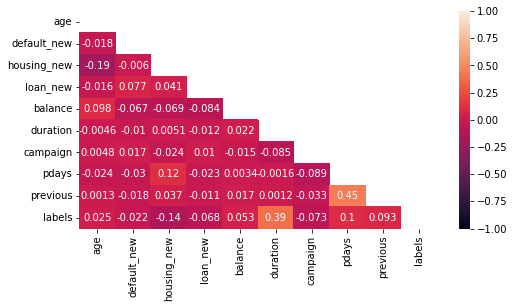

In [ ]:
# Correlation Test
plt.figure(figsize=(8,4))

mask = np.triu(np.ones_like(num.corr(), dtype=bool))

sns.heatmap(num.corr(),vmin=-1, vmax=1,mask=mask, annot=True)
plt.show()

**Conclusion :**

Dari heatmap diatas dapat dilihat bahwa tidak terjadi multikolinearitas pada data yang ditandai dengan tidak adanya korelasi yang tinggi antar variabel bebas pada dataset.

In [ ]:
num.skew()

age             0.684818
default_new     7.245375
housing_new    -0.224766
loan_new        1.852617
balance         8.360308
duration        3.144318
campaign        4.898650
pdays           2.615715
previous       41.846454
labels          2.383480
dtype: float64

In [ ]:
# Prepare data
numeric = num.columns[0:-1]
x_num = num[numeric]
y_num = num['labels']

x_num.head(3)

,age,default_new,housing_new,loan_new,balance,duration,campaign,pdays,previous
0,58,0,1,0,2143,261,1,-1,0
1,44,0,1,0,29,151,1,-1,0
2,33,0,1,1,2,76,1,-1,0


In [ ]:
# Data normalization
x_numnorm = MinMaxScaler().fit_transform(x_num)

In [ ]:
# ANOVA
fscore,pvalue = f_classif(x_numnorm,y_num)

for i in range(len(numeric)):print(numeric[i],pvalue[i])

age 8.82564369173634e-08
default_new 1.866326526158345e-06
housing_new 2.621926571845309e-194
loan_new 9.793657535311501e-48
balance 2.521113691910737e-29
duration 0.0
campaign 1.0123473643070218e-54
pdays 3.7905533194863624e-108
previous 7.801830349573926e-88


**Conclusion :** Semua variabel numeric signifikan berpengaruh terhadap variabel Y

Notes :  

- Pvalue < 0.05 : significant variables
- Pvalue >= 0.05 : non significant variables

## Data Preprocessing 2

Tahapan persiapan data sebelum memasuki tahapan training model

### Data Training

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_new,housing_new,loan_new,labels
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0,0


In [ ]:
train.contact.value_counts()
# Variabel contact akan didrop karena dianggap tidak terlalu berpengaruh (semua pelanggan dihubungi melalui panggilan telepon)

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
# Drop unecessary variables
train.drop(columns=['default','loan','housing','day','month','contact','y'],inplace=True)

In [ ]:
train.head()

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_new,housing_new,loan_new,labels
0,58,management,married,tertiary,2143,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,151,1,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,76,1,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,unknown,1506,92,1,-1,0,unknown,0,1,0,0
4,33,unknown,single,unknown,1,198,1,-1,0,unknown,0,0,0,0


In [ ]:
train.shape

(45211, 14)

In [ ]:
# Rearrange urutan columns untuk mempermudah data prepocessing
train_data = train[['poutcome','marital','job','education','age','balance','duration','campaign','pdays','previous','default_new','housing_new','loan_new','labels']]
train_data.head()

,poutcome,marital,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new,labels
0,unknown,married,management,tertiary,58,2143,261,1,-1,0,0,1,0,0
1,unknown,single,technician,secondary,44,29,151,1,-1,0,0,1,0,0
2,unknown,married,entrepreneur,secondary,33,2,76,1,-1,0,0,1,1,0
3,unknown,married,blue-collar,unknown,47,1506,92,1,-1,0,0,1,0,0
4,unknown,single,unknown,unknown,33,1,198,1,-1,0,0,0,0,0


In [ ]:
train_data

,poutcome,marital,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new,labels
0,unknown,married,management,tertiary,58,2143,261,1,-1,0,0,1,0,0
1,unknown,single,technician,secondary,44,29,151,1,-1,0,0,1,0,0
2,unknown,married,entrepreneur,secondary,33,2,76,1,-1,0,0,1,1,0
3,unknown,married,blue-collar,unknown,47,1506,92,1,-1,0,0,1,0,0
4,unknown,single,unknown,unknown,33,1,198,1,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,unknown,married,technician,tertiary,51,825,977,3,-1,0,0,0,0,1
45207,unknown,divorced,retired,primary,71,1729,456,2,-1,0,0,0,0,1
45208,success,married,retired,secondary,72,5715,1127,5,184,3,0,0,0,1
45209,unknown,married,blue-collar,secondary,57,668,508,4,-1,0,0,0,0,0


In [ ]:
# Encoder some variables
train_data['job'] = LabelEncoder().fit_transform(train_data['job'])
train_data['education'] = LabelEncoder().fit_transform(train_data['education'])

In [ ]:
# Choosing variables names
predictors=train_data.columns[0:-1]
predictors_onehot=train_data.columns[0:2]
predictors_num=train_data.columns[2:-1]
# Choosing the variable
X_train = train_data[predictors]
X_onehot = train_data[predictors_onehot]
X_num = train_data[predictors_num]

In [ ]:
X_train.head(3)

,poutcome,marital,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,unknown,married,4,2,58,2143,261,1,-1,0,0,1,0
1,unknown,single,9,1,44,29,151,1,-1,0,0,1,0
2,unknown,married,2,1,33,2,76,1,-1,0,0,1,1


In [ ]:
X_onehot.head(3)

,poutcome,marital
0,unknown,married
1,unknown,single
2,unknown,married


In [ ]:
X_num.head(3)

,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,4,2,58,2143,261,1,-1,0,0,1,0
1,9,1,44,29,151,1,-1,0,0,1,0
2,2,1,33,2,76,1,-1,0,0,1,1


In [ ]:
y_train = train_data['labels']
y_train.value_counts()

0    39922
1     5289
Name: labels, dtype: int64

In [ ]:
X_onehot= pd.get_dummies(X_onehot, columns = predictors_onehot)
X_onehot.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0
3,0,0,0,1,0,1,0
4,0,0,0,1,0,0,1


In [ ]:
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(X_num))
X_num.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359
3,-1.020516,2.373280,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
4,2.035139,2.373280,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,-0.13549,-1.118674,-0.436803


In [ ]:
X_num.columns = predictors_num
X_num.head()

,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359
3,-1.020516,2.373280,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
4,2.035139,2.373280,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,-0.13549,-1.118674,-0.436803


In [ ]:
X_train = pd.concat([X_onehot, X_num], axis = 1)
X_train.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,0,0,0,1,0,1,0,-0.103820,1.036362,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
1,0,0,0,1,0,0,1,1.424008,-0.300556,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
2,0,0,0,1,0,1,0,-0.714951,-0.300556,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,2.289359
3,0,0,0,1,0,1,0,-1.020516,2.373280,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,-0.13549,0.893915,-0.436803
4,0,0,0,1,0,0,1,2.035139,2.373280,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,-0.13549,-1.118674,-0.436803


In [ ]:
# checker
X_train.shape

(45211, 18)

In [ ]:
# checker
y_train.shape

(45211,)

### Data Testing

In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_new,housing_new,loan_new,labels
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,1,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,1,0,0


In [ ]:
# Drop unecessary variables
test.drop(columns=['default','loan','housing','day','month','contact','y'],inplace=True)

In [ ]:
test.head()

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_new,housing_new,loan_new,labels
0,30,unemployed,married,primary,1787,79,1,-1,0,unknown,0,0,0,0
1,33,services,married,secondary,4789,220,1,339,4,failure,0,1,1,0
2,35,management,single,tertiary,1350,185,1,330,1,failure,0,1,0,0
3,30,management,married,tertiary,1476,199,4,-1,0,unknown,0,1,1,0
4,59,blue-collar,married,secondary,0,226,1,-1,0,unknown,0,1,0,0


In [ ]:
test.shape

(4521, 14)

In [ ]:
# Rearrange urutan columns untuk mempermudah data prepocessing
test_data = test[['poutcome','marital','job','education','age','balance','duration','campaign','pdays','previous','default_new','housing_new','loan_new','labels']]
test_data.head()

,poutcome,marital,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new,labels
0,unknown,married,unemployed,primary,30,1787,79,1,-1,0,0,0,0,0
1,failure,married,services,secondary,33,4789,220,1,339,4,0,1,1,0
2,failure,single,management,tertiary,35,1350,185,1,330,1,0,1,0,0
3,unknown,married,management,tertiary,30,1476,199,4,-1,0,0,1,1,0
4,unknown,married,blue-collar,secondary,59,0,226,1,-1,0,0,1,0,0


In [ ]:
test_data.shape

(4521, 14)

In [ ]:
# Encoder some variables
test_data['job'] = LabelEncoder().fit_transform(test_data['job'])
test_data['education'] = LabelEncoder().fit_transform(test_data['education'])

In [ ]:
# Choosing variables names
predictors=test_data.columns[0:-1]
predictors_onehot=test_data.columns[0:2]
predictors_num=test_data.columns[2:-1]
# Choosing the variable
X_test = test_data[predictors]
X_onehot = test_data[predictors_onehot]
X_num = test_data[predictors_num]

In [ ]:
X_test.head(3)

,poutcome,marital,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,unknown,married,10,0,30,1787,79,1,-1,0,0,0,0
1,failure,married,7,1,33,4789,220,1,339,4,0,1,1
2,failure,single,4,2,35,1350,185,1,330,1,0,1,0


In [ ]:
X_onehot.head(3)

,poutcome,marital
0,unknown,married
1,failure,married
2,failure,single


In [ ]:
X_num.head(3)

,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,10,0,30,1787,79,1,-1,0,0,0,0
1,7,1,33,4789,220,1,339,4,0,1,1
2,4,2,35,1350,185,1,330,1,0,1,0


In [ ]:
y_test = test_data['labels']
y_test.value_counts()

0    4000
1     521
Name: labels, dtype: int64

In [ ]:
X_onehot= pd.get_dummies(X_onehot, columns = predictors_onehot)
X_onehot.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1
3,0,0,0,1,0,1,0
4,0,0,0,1,0,1,0


In [ ]:
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(X_num))
X_num.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.716804,-1.644755,-1.056270,0.121072,-0.711861,-0.576829,-0.407218,-0.320413,-0.130759,-1.142051,-0.424756
1,0.795246,-0.309038,-0.772583,1.118644,-0.169194,-0.576829,2.989044,2.041734,-0.130759,0.875617,2.354292
2,-0.126313,1.026680,-0.583458,-0.024144,-0.303898,-0.576829,2.899143,0.270124,-0.130759,0.875617,-0.424756
3,-0.126313,1.026680,-1.056270,0.017726,-0.250017,0.387967,-0.407218,-0.320413,-0.130759,0.875617,2.354292
4,-1.047871,-0.309038,1.686036,-0.472753,-0.146102,-0.576829,-0.407218,-0.320413,-0.130759,0.875617,-0.424756


In [ ]:
X_num.columns = predictors_num
X_num.head()

,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,1.716804,-1.644755,-1.056270,0.121072,-0.711861,-0.576829,-0.407218,-0.320413,-0.130759,-1.142051,-0.424756
1,0.795246,-0.309038,-0.772583,1.118644,-0.169194,-0.576829,2.989044,2.041734,-0.130759,0.875617,2.354292
2,-0.126313,1.026680,-0.583458,-0.024144,-0.303898,-0.576829,2.899143,0.270124,-0.130759,0.875617,-0.424756
3,-0.126313,1.026680,-1.056270,0.017726,-0.250017,0.387967,-0.407218,-0.320413,-0.130759,0.875617,2.354292
4,-1.047871,-0.309038,1.686036,-0.472753,-0.146102,-0.576829,-0.407218,-0.320413,-0.130759,0.875617,-0.424756


In [ ]:
X_test = pd.concat([X_onehot, X_num], axis = 1)
X_test.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single,job,education,age,balance,duration,campaign,pdays,previous,default_new,housing_new,loan_new
0,0,0,0,1,0,1,0,1.716804,-1.644755,-1.056270,0.121072,-0.711861,-0.576829,-0.407218,-0.320413,-0.130759,-1.142051,-0.424756
1,1,0,0,0,0,1,0,0.795246,-0.309038,-0.772583,1.118644,-0.169194,-0.576829,2.989044,2.041734,-0.130759,0.875617,2.354292
2,1,0,0,0,0,0,1,-0.126313,1.026680,-0.583458,-0.024144,-0.303898,-0.576829,2.899143,0.270124,-0.130759,0.875617,-0.424756
3,0,0,0,1,0,1,0,-0.126313,1.026680,-1.056270,0.017726,-0.250017,0.387967,-0.407218,-0.320413,-0.130759,0.875617,2.354292
4,0,0,0,1,0,1,0,-1.047871,-0.309038,1.686036,-0.472753,-0.146102,-0.576829,-0.407218,-0.320413,-0.130759,0.875617,-0.424756


In [ ]:
# checker
X_test.shape

(4521, 18)

In [ ]:
# checker
y_test.shape

(4521,)

## Training Model

### Deep Neural Network (DNN) 

In [ ]:
# Convert Data into Numpy arrays
X_train_array=np.array(X_train)
X_test_array=np.array(X_test)
y_train_array=np.array(y_train)
y_test_array=np.array(y_test)

In [ ]:
# Ukuran data
X_train_array.shape,X_test_array.shape,y_train_array.shape,y_test_array.shape

((45211, 18), (4521, 18), (45211,), (4521,))

In [ ]:
# Build model
def dnn_model():
  model = keras.Sequential()
  model.add(keras.Input(shape=(18,))) #18 variables
  model.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_1'))
  model.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_2'))
  model.add(tf.keras.layers.Dense(16, activation='relu', name='Layer_3'))
  model.add(tf.keras.layers.Dense(16, activation='relu', name='Layer_4'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))
  return model

In [ ]:
# panggil model
model = dnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 64)                1216      
                                                                 
 Layer_2 (Dense)             (None, 32)                2080      
                                                                 
 Layer_3 (Dense)             (None, 16)                528       
                                                                 
 Layer_4 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 4,113
Trainable params: 4,113
Non-trainabl

In [ ]:
# callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
learning_rate = 0.001
model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=learning_rate),metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=150,batch_size = 32,callbacks = [callback])

Epoch 1/150
1413/1413 [==============================] - 9s 3ms/step - loss: 0.2582 - accuracy: 0.8934 - val_loss: 0.2479 - val_accuracy: 0.9002
Epoch 2/150
1413/1413 [==============================] - 5s 3ms/step - loss: 0.2427 - accuracy: 0.9009 - val_loss: 0.2409 - val_accuracy: 0.8996
Epoch 3/150
1413/1413 [==============================] - 4s 3ms/step - loss: 0.2393 - accuracy: 0.9006 - val_loss: 0.2420 - val_accuracy: 0.9011
Epoch 4/150
1413/1413 [==============================] - 5s 3ms/step - loss: 0.2369 - accuracy: 0.9003 - val_loss: 0.2410 - val_accuracy: 0.9040
Epoch 5/150
1413/1413 [==============================] - 4s 3ms/step - loss: 0.2355 - accuracy: 0.9010 - val_loss: 0.2403 - val_accuracy: 0.9033
Epoch 6/150
1413/1413 [==============================] - 4s 3ms/step - loss: 0.2346 - accuracy: 0.9012 - val_loss: 0.2367 - val_accuracy: 0.9025
Epoch 7/150
1413/1413 [==============================] - 4s 3ms/step - loss: 0.2335 - accuracy: 0.9017 - val_loss: 0.2350 - val_ac

In [ ]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) >th, 1, 0)

In [ ]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test, y_test_preds)

array([[3929,   71],
       [ 259,  262]])

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

142/142 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.9270


[0.17894525825977325, 0.9270073175430298]

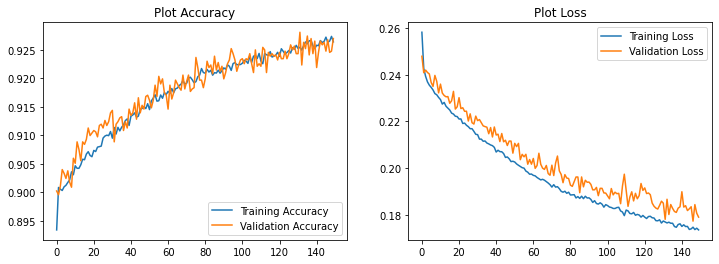

In [ ]:
# plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Plot Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Plot Loss')
plt.show()

### Convolutional Neural Network (CNN)

In [ ]:
# Reshaping
train_shape = X_train.to_numpy()
sample_size = train_shape.shape[0] # number of samples in train set
time_steps  = train_shape.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = train_shape.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (45211, 18, 1)
1 Sample shape:
 (18, 1)
An example sample:
 [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [-0.10381968]
 [ 1.03636182]
 [ 1.60696496]
 [ 0.25641925]
 [ 0.0110161 ]
 [-0.56935064]
 [-0.41145311]
 [-0.25194037]
 [-0.13548989]
 [ 0.89391541]
 [-0.43680347]]


In [ ]:
#reshape test data
test_shape = test_data.to_numpy()

test_data_reshaped = test_shape.reshape(test_shape.shape[0],test_shape.shape[1],1)

In [ ]:
# Build model
def cnn_model():
  n_timesteps = train_data_reshaped.shape[1]
  n_features  = train_data_reshaped.shape[2]
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
# panggil model
model = cnn_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 16, 32)            128       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 8, 32)            0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 32)                8224      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                     

In [ ]:
# callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
learning_rate = 0.001
model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=learning_rate),metrics=["accuracy"])

In [ ]:
# Store training stats
history = model.fit(train_data_reshaped, y_train_array,validation_data=(X_test_array, y_test_array), epochs=150,validation_split=0.3, verbose=1,batch_size = 32, callbacks = [callback])

Epoch 1/150
989/989 [==============================] - 5s 5ms/step - loss: 0.1863 - accuracy: 0.9372 - val_loss: 0.7827 - val_accuracy: 0.7517
Epoch 2/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1510 - accuracy: 0.9458 - val_loss: 0.6765 - val_accuracy: 0.7515
Epoch 3/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1512 - accuracy: 0.9454 - val_loss: 0.7581 - val_accuracy: 0.7533
Epoch 4/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1472 - accuracy: 0.9453 - val_loss: 0.7795 - val_accuracy: 0.7514
Epoch 5/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1473 - accuracy: 0.9453 - val_loss: 0.7844 - val_accuracy: 0.7504
Epoch 6/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1461 - accuracy: 0.9460 - val_loss: 0.7324 - val_accuracy: 0.7523
Epoch 7/150
989/989 [==============================] - 4s 4ms/step - loss: 0.1456 - accuracy: 0.9462 - val_loss: 0.6913 - val_accuracy: 0.7486

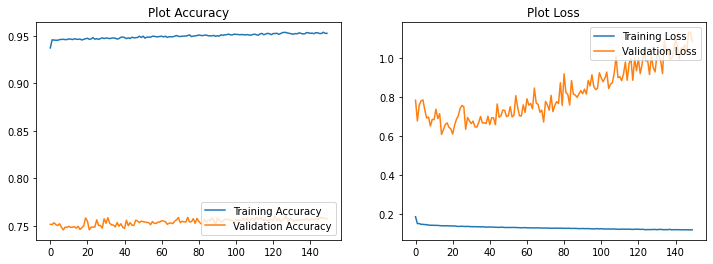

In [ ]:
# plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Plot Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Plot Loss')
plt.show()